In [9]:
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Cleaned_Data/HomeSalesData_cleaned.csv')
zip_df = pd.read_csv('Cleaned_Data/historical_2016_cleaned.csv')
df.head()

,County,State,Year,Month,Period Begin,Period End,Homes Sold,Homes Sold with Price Drop,Homes Sold with Price Drop (%),Median Sale Price,...,Active Listings,Age of Inventory,Median List Price,Median List Price per Sqft,Average Offer to List,Average Sale to List Ratio,Median Days on Market,Months of Supply,Price Drops of Inventory (%),Homes Sold Above List (%)
0,Mecklenburg County,NC,2017,January,2017-01-09 00:00:00,2017-01-15,265,75,28.30%,249000.0,...,4899,76.0,"$289,877.50",$124.89,0.88,0.98,82.0,18.49,2.15%,23.02%
1,Mecklenburg County,NC,2017,January,2017-01-16 00:00:00,2017-01-22,267,74,27.72%,200000.0,...,5008,74.0,"$285,910.00",$124.02,0.99,0.98,67.0,18.76,2.55%,18.35%
2,Mecklenburg County,NC,2017,January,2017-01-30 00:00:00,2017-02-05,306,81,26.47%,209950.0,...,5261,65.0,"$289,383.00",$124.83,0.86,0.98,78.5,17.19,2.40%,23.86%
3,Mecklenburg County,NC,2017,February,2017-02-06 00:00:00,2017-02-12,243,50,20.58%,195500.0,...,5444,59.0,"$287,445.50",$125.16,0.97,0.97,78.0,22.40,2.63%,25.51%
4,Mecklenburg County,NC,2017,February,2017-02-20 00:00:00,2017-02-26,314,79,25.16%,228700.0,...,5776,44.0,"$289,000.00",$125.79,0.99,0.99,73.0,18.39,2.57%,26.75%


In [11]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df.Year.values.reshape(-1, 1)
y = df["Median Sale Price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (203, 1) (203, 1)


array([[2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [2018],
       [20

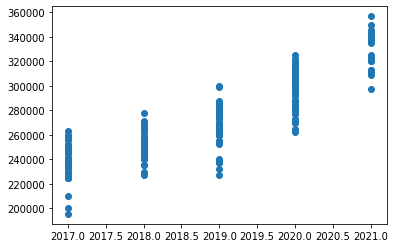

In [12]:
# Plot the data

plt.scatter(X, y)

In [13]:
# Create the model and fit the model to the data

model = LinearRegression()
model

LinearRegression()

In [14]:
# Fit the model to the data. 

model.fit(X,y)

LinearRegression()

In [15]:
# Print the coefficient and the intercept for the model
print(model.coef_)
print(model.intercept_)

[[22153.15326244]]
[-44451597.46653332]


In [16]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2017]]
Max X Value: [[2021]]


In [17]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

print(y_min)
print(y_max)

[[231312.66380633]]
[[319925.27685608]]


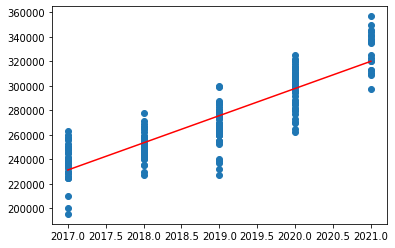

In [18]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X,y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 231438300.0300217
R-squared (R2 ): 0.7738100005160224


In [20]:
# Overall Score for the model
model.score(X, y)

0.7738100005160224

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Score the model using the testing data
model.score(X_test, y_test)

0.8079688741959554

In [28]:
Xnew = [[2022], [2023], [2024], [2025], [2030], [2040], [2050], [2060], [2070]]
ynew = model.predict(Xnew)

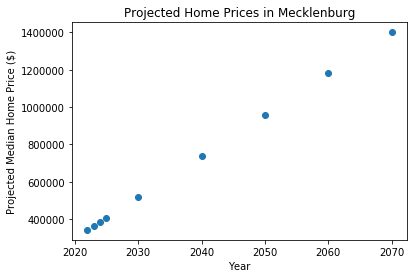

In [32]:
plt.scatter(Xnew,ynew)
plt.xlabel("Year")
plt.ylabel("Projected Median Home Price ($)")
plt.title("Projected Home Prices in Mecklenburg")
plt.savefig("Images/Projected_Prices.png")